In [ ]:
!pip install gym

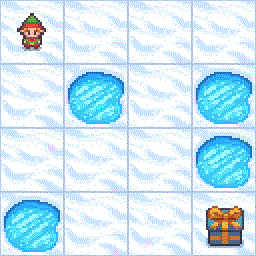

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<ipython-input-5-ef9fcb077583>:101: Matplot

Optimal Value Function:
[[0.54202581 0.49880303 0.47069551 0.4568515 ]
 [0.55845085 0.         0.35834799 0.        ]
 [0.59179866 0.64307976 0.6152075  0.        ]
 [0.         0.7417204  0.86283741 0.        ]]

Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):
[[0 3 3 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]
S ^ ^ ^
< H < H
^ v < H
H > v G


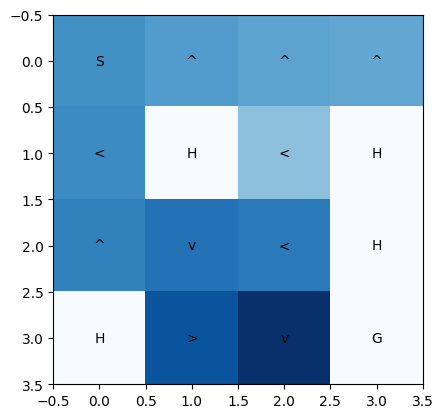

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize the "FrozenLake-v1" environment
env = gym.make("FrozenLake-v1", is_slippery=True)

# Value Iteration algorithm parameters
gamma = 0.99  # Discount factor
theta = 1e-8  # Convergence threshold
max_iterations = 5000  # Maximum number of iterations

# Initialize the value function
V = np.zeros(env.observation_space.n)

def one_step_lookahead(state, V):
    """
    Helper function to calculate the state-value function.
    Parameters:
    - state: The current state
    - V: The current value function

    Returns:
    - A vector of action values for each action in the state
    """
    A = np.zeros(env.action_space.n)
    for action in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[state][action]:
            A[action] += prob * (reward + gamma * V[next_state])
    return A

def value_iteration(env, gamma, theta, max_iterations):
    """
    Value Iteration algorithm.
    Parameters:
    - env: The OpenAI Gym environment
    - gamma: Discount factor
    - theta: Convergence threshold
    - max_iterations: Maximum number of iterations

    Returns:
    - V: The optimal value function
    - policy: The optimal policy
    """
    V = np.zeros(env.observation_space.n)
    for i in range(max_iterations):
        delta = 0
        for state in range(env.observation_space.n):
            A = one_step_lookahead(state, V)
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[state]))
            V[state] = best_action_value
        if delta < theta:
            break

    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for state in range(env.observation_space.n):
        A = one_step_lookahead(state, V)
        best_action = np.argmax(A)
        policy[state, best_action] = 1.0

    return V, policy

# Run Value Iteration
optimal_value_function, optimal_policy = value_iteration(env, gamma, theta, max_iterations)

print("Optimal Value Function:")
print(optimal_value_function.reshape((4, 4)))

print("\nOptimal Policy (0=Left, 1=Down, 2=Right, 3=Up):")
print(np.argmax(optimal_policy, axis=1).reshape((4, 4)))

# Visualization function
def visualize_policy(env, policy):
    """
    Visualize the optimal policy using matplotlib.
    Parameters:
    - env: The OpenAI Gym environment
    - policy: The optimal policy
    """
    lake_map = env.desc.astype(str).tolist()
    policy_actions = np.argmax(policy, axis=1)
    action_mapping = {0: '<', 1: 'v', 2: '>', 3: '^'}

    for row in range(env.nrow):
        for col in range(env.ncol):
            state = row * env.ncol + col
            if lake_map[row][col] == 'S':
                lake_map[row][col] = 'S'
            elif lake_map[row][col] == 'H':
                lake_map[row][col] = 'H'
            elif lake_map[row][col] == 'G':
                lake_map[row][col] = 'G'
            else:
                lake_map[row][col] = action_mapping[policy_actions[state]]

    for row in lake_map:
        print(' '.join(row))

    fig, ax = plt.subplots()
    cmap = plt.cm.get_cmap('Blues')
    ax.imshow(optimal_value_function.reshape((env.nrow, env.ncol)), cmap=cmap)
    for i in range(env.nrow):
        for j in range(env.ncol):
            ax.text(j, i, lake_map[i][j], ha='center', va='center', color='black')
    plt.show()

# Visualize the optimal policy
visualize_policy(env, optimal_policy)